In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata
from scipy.stats import pearsonr

sns.set_style('ticks', {"axes.linewidth": "1",'axes.yaxis.grid':False}) 

matplotlib.rcParams.update({
    'axes.spines.top' : False, 
    'axes.spines.right' : False, 
    'xtick.direction' : 'out', 
    'ytick.direction' : 'out',
    'font.size': 14 })

#importing core libraries 

In [2]:
import pandas as pd 
import numpy as np
import pickle as pk
from utils.phys_utils import nnan_pearsonr as nnan_pearsonr

In [3]:


fn = '../data/all_hand_dmfc_dataset_50ms.pkl'
with open(fn, 'rb') as file:
    loaded_data = pk.load(file)   # dill can sometimes bypass pandas’s C‐API


In [4]:
import utils.dataset_augment_utils as dataset_augment_utils
import utils.data_utils as data_utils
import utils.phys_utils as phys_utils

In [5]:
import sys
sys.path.append('./utils')

In [6]:
import phys_utils
import dataset_augment_utils
import data_utils

In [7]:
data = data_utils.load_neural_dataset(timebinsize=50,subject_id='all_hand_dmfc',recompute_augment=True)

data_aug = dataset_augment_utils.augment_data_structure(data)

In [9]:
xfn, yfn = 'ball_pos_x_TRUE', 'ball_pos_y_TRUE' #set condition and field names
condition = 'occ'
mask_fn = 'start_end_pad0'

x, y = data_aug['behavioral_responses'][condition][xfn], data_aug['behavioral_responses'][condition][yfn] # extract ball positions arrays and the mask
m = data_aug['masks'][condition][mask_fn]

xm = phys_utils.apply_mask(x,m)
ym = phys_utils.apply_mask(y,m)

/tmp/ipykernel_2852870/2885258573.py:2: RuntimeWarning: Mean of empty slice
  mean_x = np.nanmean(xm, axis=0)
/tmp/ipykernel_2852870/2885258573.py:3: RuntimeWarning: Mean of empty slice
  mean_y = np.nanmean(ym, axis=0)


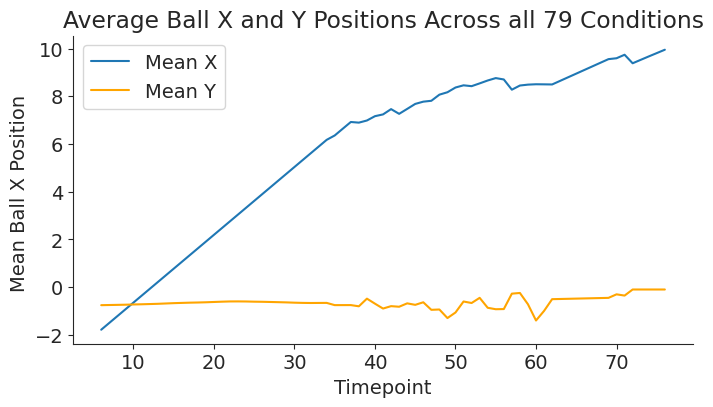

In [10]:
#compute the mean of x & y positions at each timepoint (ignoring NaNs)
mean_x = np.nanmean(xm, axis=0) 
mean_y = np.nanmean(ym, axis=0) 

#creating simple pred arrays by repeat the mean for all trials
simple_pred_x = np.tile(mean_x, (xm.shape[0], 1))
simple_pred_y = np.tile(mean_y, (ym.shape[0], 1)) 


#check for timepoints where the mean could be computed
valid_timepoints = ~np.isnan(mean_x)

#Plot the avg ball pos acroos all the conditions for each valid timestamp 
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(mean_x))[valid_timepoints], mean_x[valid_timepoints], label='Mean X')
plt.plot(np.arange(len(mean_y))[valid_timepoints], mean_y[valid_timepoints], label='Mean Y', color = 'orange' )
plt.xlabel('Timepoint')
plt.ylabel('Mean Ball X Position ')
plt.title('Average Ball X and Y Positions Across all 79 Conditions')
plt.legend()
plt.show()



In [11]:
xm.shape

(79, 100)

In [12]:
ym.shape

(79, 100)

Text(0.5, 1.0, 'Average Ball X and Y Positions Across all 79 Conditions')

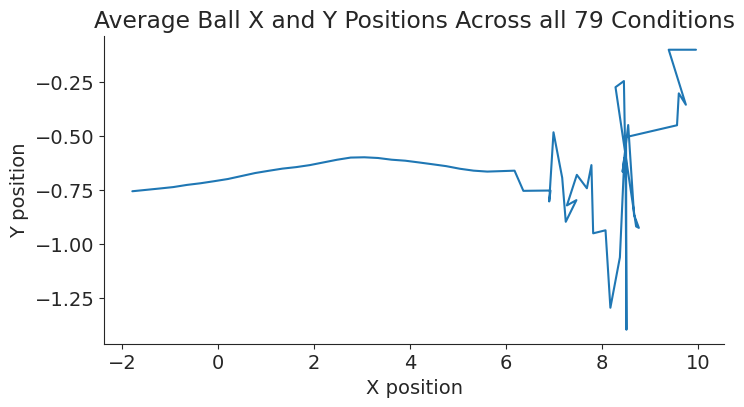

In [13]:
plt.figure(figsize=(8,4))
plt.plot(mean_x[valid_timepoints], mean_y[valid_timepoints], label='average trajectory')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Average Ball X and Y Positions Across all 79 Conditions')

In [14]:
np.arange(4)

array([0, 1, 2, 3])

In [15]:
len(mean_y)

100

In [16]:
valid_timepoints

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [17]:
np.arange(len(mean_y))[valid_timepoints]

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76])

Text(0, 0.5, 'Y position')

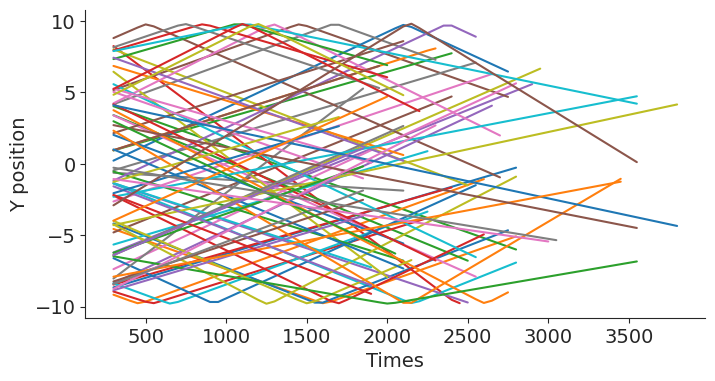

In [18]:
plt.figure(figsize=(8,4))

for i in range(0,79):
    plt.plot(np.arange(len(mean_y))[valid_timepoints]*50, ym[i,valid_timepoints], label='average trajectory')
plt.xlabel('Times')
plt.ylabel('Y position')

Text(0, 0.5, 'X position')

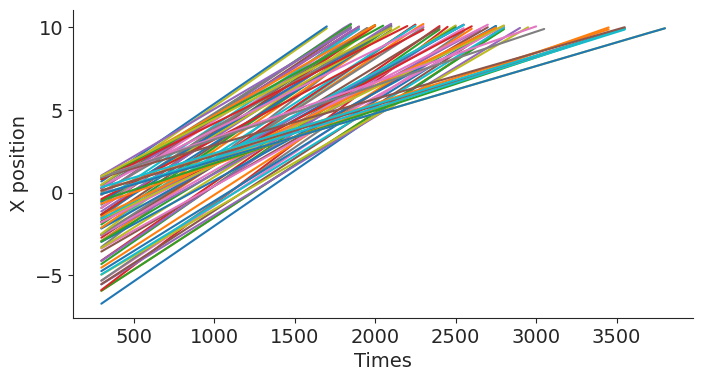

In [19]:
plt.figure(figsize=(8,4))

for i in range(0,79):
    plt.plot(np.arange(len(mean_x))[valid_timepoints]*50, xm[i,valid_timepoints], label='average trajectory')
plt.xlabel('Times')
plt.ylabel('X position')

In [24]:
yfn = 'ball_pos_y_TRUE'
condition = 'occ'
mask_fn = 'start_end_pad0'

y = data_aug['behavioral_responses'][condition], data_aug['behavioral_responses'][condition][yfn]
m = data_aug['masks'][condition][mask_fn]

ym = phys_utils.apply_mask(y,m)

f,axes = plt.subplots(1,1,figsize=(10,10))

for xi in range(xm.shape[0]):
    xes.plot(ym[xi,:], '-o', color=all_cols['yf'][xi])
axes.plot([-10, 10], [10,10], 'k--', lw=3)
axes.plot([-10, 10], [-10,-10], 'k--', lw=3)
axes.plot([-10, -10], [-10,10], 'k--', lw=3)
axes.plot([10, 10], [-10,10], 'k--', lw=3)
axes.plot([5, 5], [-10,10], 'k--', lw=2)
plt.axis('off')
plt.tight_layout()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

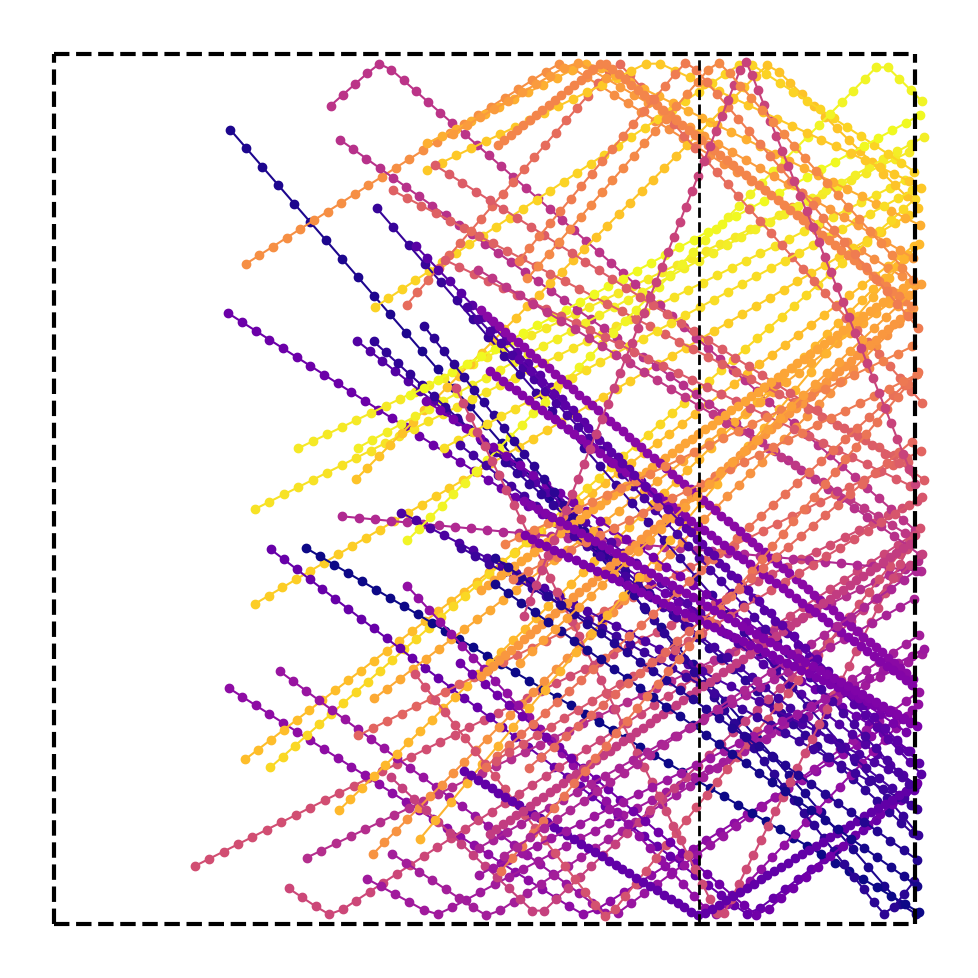

In [23]:
xfn, yfn = 'ball_pos_x_TRUE', 'ball_pos_y_TRUE'
condition = 'occ'
mask_fn = 'start_end_pad0'

x, y = data_aug['behavioral_responses'][condition][xfn], data_aug['behavioral_responses'][condition][yfn]
m = data_aug['masks'][condition][mask_fn]

xm = phys_utils.apply_mask(x,m)
ym = phys_utils.apply_mask(y,m)
f,axes = plt.subplots(1,1,figsize=(10,10))
for xi in range(xm.shape[0]):
    axes.plot(xm[xi,:], ym[xi,:], '-o', color=all_cols['yf'][xi])
axes.plot([-10, 10], [10,10], 'k--', lw=3)
axes.plot([-10, 10], [-10,-10], 'k--', lw=3)
axes.plot([-10, -10], [-10,10], 'k--', lw=3)
axes.plot([10, 10], [-10,10], 'k--', lw=3)
axes.plot([5, 5], [-10,10], 'k--', lw=2)
plt.axis('off')
plt.tight_layout()


In [21]:
 vector_a= np.array([xm[0,8], ym[0,8]])

In [ ]:
print(vector_a)

In [ ]:
distance_matrix=np.zeros([79,100])

In [ ]:
for j in range(0,4):
#     vector_c = np.array([xm[j], ym[j]])
    print(f"j={j}")
    
    for i in range(0,7):

        print(f"i={i}")

In [ ]:
for j in range(0,79):
#     vector_c = np.array([xm[j], ym[j]])
    
    for i in range(0,len(mean_x)):
        vector_a= np.array([xm[j,i], ym[j,i]])
        vector_b= np.array([mean_x[i], mean_y[i]])

        distance = np.linalg.norm(vector_a - vector_b)
        distance_matrix[j,i]=distance


In [ ]:
 distance_matrix[0,45]

In [ ]:
 distance_matrix.shape

In [ ]:
len(mean_x)

In [ ]:
np.save('distance_matrix.npy',distance_matrix)

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(mean_x))[valid_timepoints]*50, np.nanmean(distance_matrix, axis=0)[valid_timepoints] )

plt.xlabel('Timepoint')
plt.ylabel('Distance')

In [ ]:
mask_start_occ = data_aug['masks']['occ']['start_occ_pad0']
mask_occ_end = data_aug['masks']['occ']['occ_end_pad0']

print(mask_start_occ)
print(mask_occ_end)

In [ ]:
print(mask_start_occ.shape)

In [ ]:
print(mask_occ_end.shape)

In [ ]:
mean_x

In [ ]:
simple_pred_x.shape

In [ ]:
print(data.keys())

In [ ]:
xm.flatten().shape

In [ ]:
def rmse(true, pred):
    #compute rmse
    mask = ~np.isnan(true) #create mask for valid points (not NAN) 
    return np.sqrt(np.nanmean((true[mask] - pred[mask]) ** 2))
                   
rmse_x = rmse(xm.flatten(), simple_pred_x.flatten())
rmse_y = rmse(ym.flatten(), simple_pred_y.flatten())
        
print(f"RMSE X:, {rmse_x:.3f}")
print(f"RMSE Y:, {rmse_y:.3f}")

In [ ]:
# Calculate RMSE at each timepoint (across all trials) 
rmse_x_time = np.sqrt(np.nanmean((xm - simple_pred_x ) ** 2, axis = 0 ))
rmse_y_time = np.sqrt(np.nanmean((ym - simple_pred_y ) ** 2, axis = 0 ))

time_ms = np.arange(len(rmse_x_time)) * 50  #valid timepoint where RMSE is not NaN

plt.figure(figsize=(10,5))
plt.plot(np.arange(len(rmse_x_time)), rmse_x_time, label = 'RMSE X')
plt.plot(np.arange(len(rmse_y_time)), rmse_y_time, label = 'RMSE Y')
plt.xlabel('Timepoint')
plt.ylabel('RMSE')
plt.title(" RMSE Simple Prediction over Time")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
 rmse_x_time.shape

In [ ]:
# Calculate RMSE at each timepoint (across all trials) 
rmse_x_time = np.sqrt(np.nanmean((xm - simple_pred_x ) ** 2, axis = 0 ))
rmse_y_time = np.sqrt(np.nanmean((ym - simple_pred_y ) ** 2, axis = 0 ))

time_ms = np.arange(len(rmse_x_time)) * 50  #valid timepoint where RMSE is not NaN

plt.figure(figsize=(10,5))
plt.plot(np.arange(len(rmse_x_time)), rmse_x_time, label = 'RMSE X')
plt.plot(np.arange(len(rmse_y_time)), rmse_y_time, label = 'RMSE Y')
plt.xlabel('Timepoint')
plt.ylabel('RMSE')
plt.title(" RMSE Simple Prediction over Time")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
#Calculate y-velocity (change in vertical poistion (y) over time for each trial)
dy = np.diff(ym, axis =1) 

#Find where the direction of vertical movement changes (sign change in dy)
#indicating bounce (went up then down or vice versa) 
sign_changes = np.sign(dy[:, :-1]) * np.sign(dy[:, 1:]) < 0 

# boolean mask that is True for trials with a least one bounce 
bounce_mask = sign_changes.any(axis=1) 

print(f"Number of bounce trials: {bounce_mask.sum()}")
print(f"Number of non-bounce trials: {(~bounce_mask).sum()}")

In [ ]:
#Separate trials into bounce and non-bounce 
xm_bounce= xm[bounce_mask]
ym_bounce = ym[bounce_mask]
xm_nonbounce = xm[~bounce_mask]
ym_nonbounce = ym[~bounce_mask]


#Same split for baseline predictions 
simple_pred_y_bounce = simple_pred_y[bounce_mask]
simple_pred_x_bounce = simple_pred_x[bounce_mask]
simple_pred_y_nonbounce = simple_pred_y[~bounce_mask]
simple_pred_x_nonbounce = simple_pred_x[~bounce_mask]


#Function to calculate error between true and predicted positions
#RMSE helper function (ignores Nans) 
def rmse(true, pred):
    mask = ~np.isnan(true)
    return np.sqrt(np.nanmean((true[mask] - pred[mask]) ** 2))

# Compute RMSE over time per group and dimension
rmse_x_time_bounce = np.sqrt(np.nanmean((xm_bounce - simple_pred_x_bounce) ** 2, axis=0))
rmse_y_time_bounce = np.sqrt(np.nanmean((ym_bounce - simple_pred_y_bounce) ** 2, axis=0))
rmse_x_time_nonbounce = np.sqrt(np.nanmean((xm_nonbounce - simple_pred_x_nonbounce) ** 2, axis=0))
rmse_y_time_nonbounce = np.sqrt(np.nanmean((ym_nonbounce - simple_pred_y_nonbounce) ** 2, axis=0))

# Calculate overall error across all times and trials, for reporting summary numbers
rmse_x_bounce = rmse(xm_bounce.flatten(), simple_pred_x_bounce.flatten())
rmse_y_bounce = rmse(ym_bounce.flatten(), simple_pred_y_bounce.flatten())
rmse_x_nonbounce = rmse(xm_nonbounce.flatten(), simple_pred_x_nonbounce.flatten())
rmse_y_nonbounce = rmse(ym_nonbounce.flatten(), simple_pred_y_nonbounce.flatten())

print(f"RMSE X (Bounce): {rmse_x_bounce:.3f}")
print(f"RMSE Y (Bounce): {rmse_y_bounce:.3f}")
print(f"RMSE X (Non-Bounce): {rmse_x_nonbounce:.3f}")
print(f"RMSE Y (Non-Bounce): {rmse_y_nonbounce:.3f}")

time_ms = np.arange(rmse_x_time_bounce.shape[0]) * 50

plt.figure(figsize=(12, 6))
sns.set_style('ticks', {"axes.linewidth": "1", 'axes.yaxis.grid': False})

# Bounce trials
plt.plot(time_ms, rmse_x_time_bounce, label='Bounce RMSE X', linestyle='--', color='purple')
plt.plot(time_ms, rmse_y_time_bounce, label='Bounce RMSE Y', linestyle='--', color='orange')

# Non-bounce trials
plt.plot(time_ms, rmse_x_time_nonbounce, label='Non-Bounce RMSE X', linestyle='-', color='green')
plt.plot(time_ms, rmse_y_time_nonbounce, label='Non-Bounce RMSE Y', linestyle='-', color='red')

plt.xlabel('Time (ms)')
plt.ylabel('RMSE')
plt.title('Baseline RMSE Over Time: Bounce vs Non-Bounce (X and Y Positions)')
plt.legend()
sns.despine()
plt.tight_layout()

plt.show()

In [ ]:
def pearson_corr(true, pred):
    mask = ~np.isnan(true) & ~np.isnan(pred)
    if np.sum(mask) < 2: 
        return np.nan 
    if np.std(pred[mask]) == 0 or np.std(true[mask]) == 0:
        return np.nan #correlation is undefined if no variability
    return pearsonr(true[mask], pred[mask])[0]

pearson_x_time_baseline = np.array([
    pearson_corr(xm[i], simple_pred_x[i]) #computing pearson correlation across trials at each timepoint
    for i in range(xm.shape[0])
])

pearson_y_time_baseline = np.array([
    pearson_corr(ym[i], simple_pred_y[i])
    for i in range(ym.shape[0])
])

# Convert time indices to milliseconds assuming 50 ms time bins
time_ms = np.arange(xm.shape[1]) * 50 

plt.figure(figsize=(10, 5))
sns.set_style('ticks')

plt.plot(pearson_x_time_baseline, label='Baseline Pearson X', color='blue')
plt.plot(pearson_y_time_baseline, label='Baseline Pearson Y', color='orange')

plt.xlabel('Time (ms)')
plt.ylabel('Pearson Correlation')
plt.title('Baseline Pearson Correlation Over Time')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

print("Pearson X baseline correlations (some values):", pearson_x_time_baseline[:10])
print("Pearson Y baseline correlations (some values):", pearson_y_time_baseline[:10])


In [ ]:
def interp_nan(arr):
    arr_interp = arr.copy()
    for i in range(arr.shape[0]):
        valid = ~np.isnan(arr[i])
        if valid.sum() < 2:
            continue
        arr_interp[i, ~valid] = np.interp(np.flatnonzero(~valid), np.flatnonzero(valid), arr[i, valid])
    return arr_interp

xm_bounce_interp = interp_nan(xm_bounce)
simple_pred_x_bounce_interp = interp_nan(simple_pred_x_bounce)
ym_bounce_interp = interp_nan(ym_bounce)
simple_pred_y_bounce_interp = interp_nan(simple_pred_y_bounce)

xm_nonbounce_interp = interp_nan(xm_nonbounce)
simple_pred_x_nonbounce_interp = interp_nan(simple_pred_x_nonbounce)
ym_nonbounce_interp = interp_nan(ym_nonbounce)
simple_pred_y_nonbounce_interp = interp_nan(simple_pred_y_nonbounce)

def pearson_corr(true, pred):
    mask = ~np.isnan(true) & ~np.isnan(pred)
    if np.sum(mask) < 2: 
        return np.nan 
    if np.std(pred[mask]) == 0 or np.std(true[mask]) == 0:
        return np.nan #correlation is undefined if no variability
    return pearsonr(true[mask], pred[mask])[0]


pearson_x_bounce = np.array([
    pearson_corr(xm_bounce_interp[i], simple_pred_x_bounce_interp[i])
    for i in range(xm_bounce_interp.shape[0])
])

pearson_y_bounce = np.array([
    pearson_corr(ym_bounce_interp[i], simple_pred_y_bounce_interp[i])
    for i in range(ym_bounce_interp.shape[0])
])

pearson_x_nonbounce = np.array([
    pearson_corr(xm_nonbounce_interp[i], simple_pred_x_nonbounce_interp[i])
    for i in range(xm_nonbounce_interp.shape[0])
])

pearson_y_nonbounce = np.array([
    pearson_corr(ym_nonbounce_interp[i], simple_pred_y_nonbounce_interp[i])
    for i in range(ym_nonbounce_interp.shape[0])
])

time_ms = np.arange(xm.shape[1]) * 50 

plt.figure(figsize=(10, 6))
sns.set_style('ticks')

plt.plot(np.arange(len(pearson_x_bounce)), pearson_x_bounce, label='Bounce X', color='purple', marker='o')
plt.plot(np.arange(len(pearson_x_nonbounce)), pearson_x_nonbounce, label='Non-Bounce X', color='blue', marker='o')
plt.plot(np.arange(len(pearson_y_bounce)), pearson_y_bounce, label='Bounce Y', color='orange', marker='o')
plt.plot(np.arange(len(pearson_y_nonbounce)), pearson_y_nonbounce, label='Non-Bounce Y', color='red', marker='o')

plt.xlabel('Trial Index')
plt.ylabel('Pearson Correlation')
plt.title('Baseline Pearson Correlation per Trial')
plt.ylim(-1, 1)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

print("Pearson X baseline correlations (some values):", pearson_x_bounce[:10])
print("Pearson Y baseline correlations (some values):", pearson_y_bounce[:10])

In [ ]:
nan_counts_per_trial = np.sum(np.isnan(xm_bounce), axis=1)
print("NaNs per trial in xm_bounce:", nan_counts_per_trial)

# Look for trials with >90% NaNs (very sparse)
print("Trials with >90% NaNs:", np.where(nan_counts_per_trial > 90)[0])


In [ ]:
from utils.decoding_summary import PlotHelper

ph = PlotHelper(
    timebinsize=50,
    subject_id='all_hand_dmfc',  # or your subject ID
    masks_to_test_suffix='start_end_pad0',  # or 'occ', whatever mask you want
    condition='occ',  # your task condition
    neural_data_to_use='neural_responses_reliable_FactorAnalysis_50',
    ncomp=50
)


In [ ]:
ph.load_data()
ph.load_ground_truth_data()
ph.get_colormap_for_decoded_variables()

In [ ]:
res = ph.get_metrics_unrolled_and_remasked(time_idx=None) #exctracting the neural decoding performance results 

In [ ]:
print(res[mask_fn].keys())

In [ ]:
print(res[mask_fn]['mse_t'].shape) # num of conistions, timepoints, and variables 
print(res[mask_fn]['mse_t'].shape[-1]) #number of decoded variables

In [ ]:
print(res[mask_fn]['mse_t'][0, 0, :])

In [ ]:
rmse_x_time_baseline = rmse_x_time 
rmse_y_time_baseline = rmse_y_time 

#load nerual decoding RMSE from res (output of the get_metrics_unrolled_and_remasked)
mask_fn = 'start_end_pad0'
beh_idx_mat = [0, 15]

#Extract MSE across all 79 conditions time points and x/y 
mse_x = res[mask_fn]['mse_t'][:, :, beh_idx_mat[0]]
mse_y = res[mask_fn]['mse_t'][:, :, beh_idx_mat[0]]


# Compute RMSE across conditions for each timepoint
rmse_x_time_neural = np.sqrt(np.nanmean(mse_x, axis=0))  # shape: (timepoints,)
rmse_y_time_neural = np.sqrt(np.nanmean(mse_y, axis=0))



In [ ]:
time_ms = np.arange(len(rmse_x_time_baseline)) * 50  # Convert timepoints to ms

plt.figure(figsize=(12, 6))
sns.set_style('ticks', {"axes.linewidth": "1", 'axes.yaxis.grid': False})

# X Position RMSE comparison
plt.plot(time_ms, rmse_x_time_baseline, label='Baseline RMSE X', linestyle='--', color='gray')
plt.plot(time_ms, rmse_x_time_neural, label='Neural Decoding RMSE X', linestyle='-', color='blue')

# Y Position RMSE comparison
plt.plot(time_ms, rmse_y_time_baseline, label='Baseline RMSE Y', linestyle='--', color='orange')
plt.plot(time_ms, rmse_y_time_neural, label='Neural Decoding RMSE Y', linestyle='-', color='red')

plt.xlabel('Time (ms)')
plt.ylabel('RMSE')
plt.title('Baseline vs Neural Decoding RMSE Over Time (X and Y Ball Positions)')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
print(list(res.keys()))

In [ ]:

print(res['start_end_pad0'].keys())  # see what one trial looks like (array of bools)


In [ ]:
print(data.keys())

In [ ]:
print(data['masks'].keys())

In [ ]:
#print(type(data['masks']['vis']))
print(data['masks']['vis'].keys())

In [ ]:
visible_mask_1d = np.nanmean(visible_mask, axis=0) > 0.5  # average across trials; True if mostly valid
occluded_mask_1d = np.nanmean(occluded_mask, axis=0) > 0.5

rmse_x_visible_baseline = np.nanmean(rmse_x_time_baseline[visible_mask_1d])
rmse_x_visible_neural = np.nanmean(rmse_x_time_neural[visible_mask_1d])

rmse_x_occluded_baseline = np.nanmean(rmse_x_time_baseline[occluded_mask_1d])
rmse_x_occluded_neural = np.nanmean(rmse_x_time_neural[occluded_mask_1d])

print("Visible epoch RMSE baseline:", rmse_x_visible_baseline)
print("Visible epoch RMSE neural:", rmse_x_visible_neural)
print("Occluded epoch RMSE baseline:", rmse_x_occluded_baseline)
print("Occluded epoch RMSE neural:", rmse_x_occluded_neural)


In [ ]:
def compute_epoch_rmse(true_data, pred_data, epoch_mask):
    rmse_per_trial = []
    for trial in range(true_data.shape[0]):
        true_vals = true_data[trial, epoch_mask]
        pred_vals = pred_data[trial, epoch_mask]
        valid = ~np.isnan(true_vals)
        if np.sum(valid) == 0:
            rmse_per_trial.append(np.nan)  # no valid data, skip
            continue
        mse = np.mean((true_vals[valid] - pred_vals[valid])**2)
        rmse_per_trial.append(np.sqrt(mse))
    return np.array(rmse_per_trial)

# Compute RMSE per trial for visible epoch
rmse_x_vis = compute_epoch_rmse(xm, simple_pred_x, visible_mask)
rmse_y_vis = compute_epoch_rmse(ym, simple_pred_y, visible_mask)

# Compute RMSE per trial for occluded epoch
rmse_x_occ = compute_epoch_rmse(xm, simple_pred_x, occluded_mask)
rmse_y_occ = compute_epoch_rmse(ym, simple_pred_y, occluded_mask)

print("RMSE X Visible (first 5 trials):", rmse_x_vis[:5])
print("RMSE Y Occluded (first 5 trials):", rmse_y_occ[:5])


In [ ]:
mask = data['masks']['vis']['start_end_pad0']
print(type(mask))
print(mask.shape)
print(np.unique(mask))


In [ ]:
print(res['start_end_pad0'].keys())